# Análisis exploratorio de datos

## Importando librerías

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import os

In [11]:
CURRENT_DIR = os.getcwd()
DATA_RAW_DIR = os.path.join(CURRENT_DIR, os.pardir, 'data', 'raw')
DATA_RAW = os.path.join(DATA_RAW_DIR, 'turnover.csv')

## Cargar datos

In [16]:
df = pd.read_csv(DATA_RAW, encoding='ISO-8859-1')

In [17]:
df.head()

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7


## Análisis estadístico

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1129 entries, 0 to 1128
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stag          1129 non-null   float64
 1   event         1129 non-null   int64  
 2   gender        1129 non-null   object 
 3   age           1129 non-null   float64
 4   industry      1129 non-null   object 
 5   profession    1129 non-null   object 
 6   traffic       1129 non-null   object 
 7   coach         1129 non-null   object 
 8   head_gender   1129 non-null   object 
 9   greywage      1129 non-null   object 
 10  way           1129 non-null   object 
 11  extraversion  1129 non-null   float64
 12  independ      1129 non-null   float64
 13  selfcontrol   1129 non-null   float64
 14  anxiety       1129 non-null   float64
 15  novator       1129 non-null   float64
dtypes: float64(7), int64(1), object(8)
memory usage: 141.2+ KB


Glosario de la data

- Stag : Experiencia (tiempo).
- Event : Deserción de trabajo (1: Abandona, 0: Se queda).
- Gender : Feminino(f), Másculino(m).
- Age : Edad del empleado (años).
- Industry : Industria del empleado.
- Profession : Profesión del empleado.
- Traffic : Si el empleado vino por recomendación, paginas, etc.
- Coach : Presencia de un entrenador en el periodo de prueba (No,Yes,My head).
- Head gender : Sexo del supervisor.
- greywage : White(salario mínimo) /Gray (pequeña cantidad por encima del mínimo).
- Way : Tranporte para ir a trabajar.
- Parametros de medición de salud: extraversion, selfcontrol, etc.


In [19]:
df.isnull().any()

stag            False
event           False
gender          False
age             False
industry        False
profession      False
traffic         False
coach           False
head_gender     False
greywage        False
way             False
extraversion    False
independ        False
selfcontrol     False
anxiety         False
novator         False
dtype: bool

### Muestro de varibles categóricas/númericas

In [21]:
# Identificamos las variables categoricas

df_objects = df.select_dtypes(include=['object']).copy() # La guardamos como variable para su posterior uso.
print(df_objects.columns.values)

['gender' 'industry' 'profession' 'traffic' 'coach' 'head_gender'
 'greywage' 'way']


In [22]:
# Luego vemos los valores únicos de tales variables

for i in df_objects.columns.values:
    print(i,':', df[i].unique(),'\n')

gender : ['m' 'f'] 

industry : ['Banks' 'PowerGeneration' 'Retail' 'manufacture' 'Consult' 'State' 'etc'
 'Building' 'IT' ' HoReCa' 'Telecom' 'Pharma' 'Mining' 'transport'
 'Agriculture' 'RealEstate'] 

profession : ['HR' 'Commercial' 'Marketing' 'etc' 'Sales' 'BusinessDevelopment'
 'Finanñe' 'Teaching' 'manage' 'IT' 'Law' 'Consult' 'Engineer' 'PR'
 'Accounting'] 

traffic : ['rabrecNErab' 'empjs' 'youjs' 'referal' 'advert' 'KA' 'recNErab'
 'friends'] 

coach : ['no' 'yes' 'my head'] 

head_gender : ['f' 'm'] 

greywage : ['white' 'grey'] 

way : ['bus' 'car' 'foot'] 



In [23]:
# Identificamos las variables numéricas

df_numerical = df.select_dtypes(exclude=['object']).copy()
print(df_numerical.columns.values,'\n')

['stag' 'event' 'age' 'extraversion' 'independ' 'selfcontrol' 'anxiety'
 'novator'] 



## Estadística

In [25]:
# Rotación de empleados

event = df['event'].value_counts()
porcentaje = [round(i*100/event.sum(),1) for i in df['event'].value_counts()]
print(event,'\n')
print('Trabajadores que renuncian : %',porcentaje[0])
print('Trabajadores que se quedan : %',porcentaje[1])

1    571
0    558
Name: event, dtype: int64 

Trabajadores que renuncian : % 50.6
Trabajadores que se quedan : % 49.4




Se observa que de los datos observados existe una mayoria de personas que renuncian a sus trabajos, siendo este del % 50.6.


In [26]:
# Promedios de valos númericos en función de la variable 'event'
df.groupby('event').mean()

,stag,age,extraversion,independ,selfcontrol,anxiety,novator
event,,,,,,,
0,38.294819,31.411829,5.563441,5.388710,5.677419,5.774910,5.866487
1,34.998191,30.729952,5.620665,5.565324,5.518914,5.558844,5.892469




Observaciones generales (Repecto a la tabla anterior)

- Las personas con menor tiempo en sus trabajos tienden a irse de ellos.
- Los trabajadores más extrovertidos, independientes, novatos y con menos autocntrol tienden a renuciar.
- La edad igual parece ser influente en la estadía de trabajo, mostrándose que las personas de mayor edad tienden a la estabilidad.



## Visualización de datos

A continuacíon se hace una visualización de las variables categoricas en función de la variable objetivo 'event'.

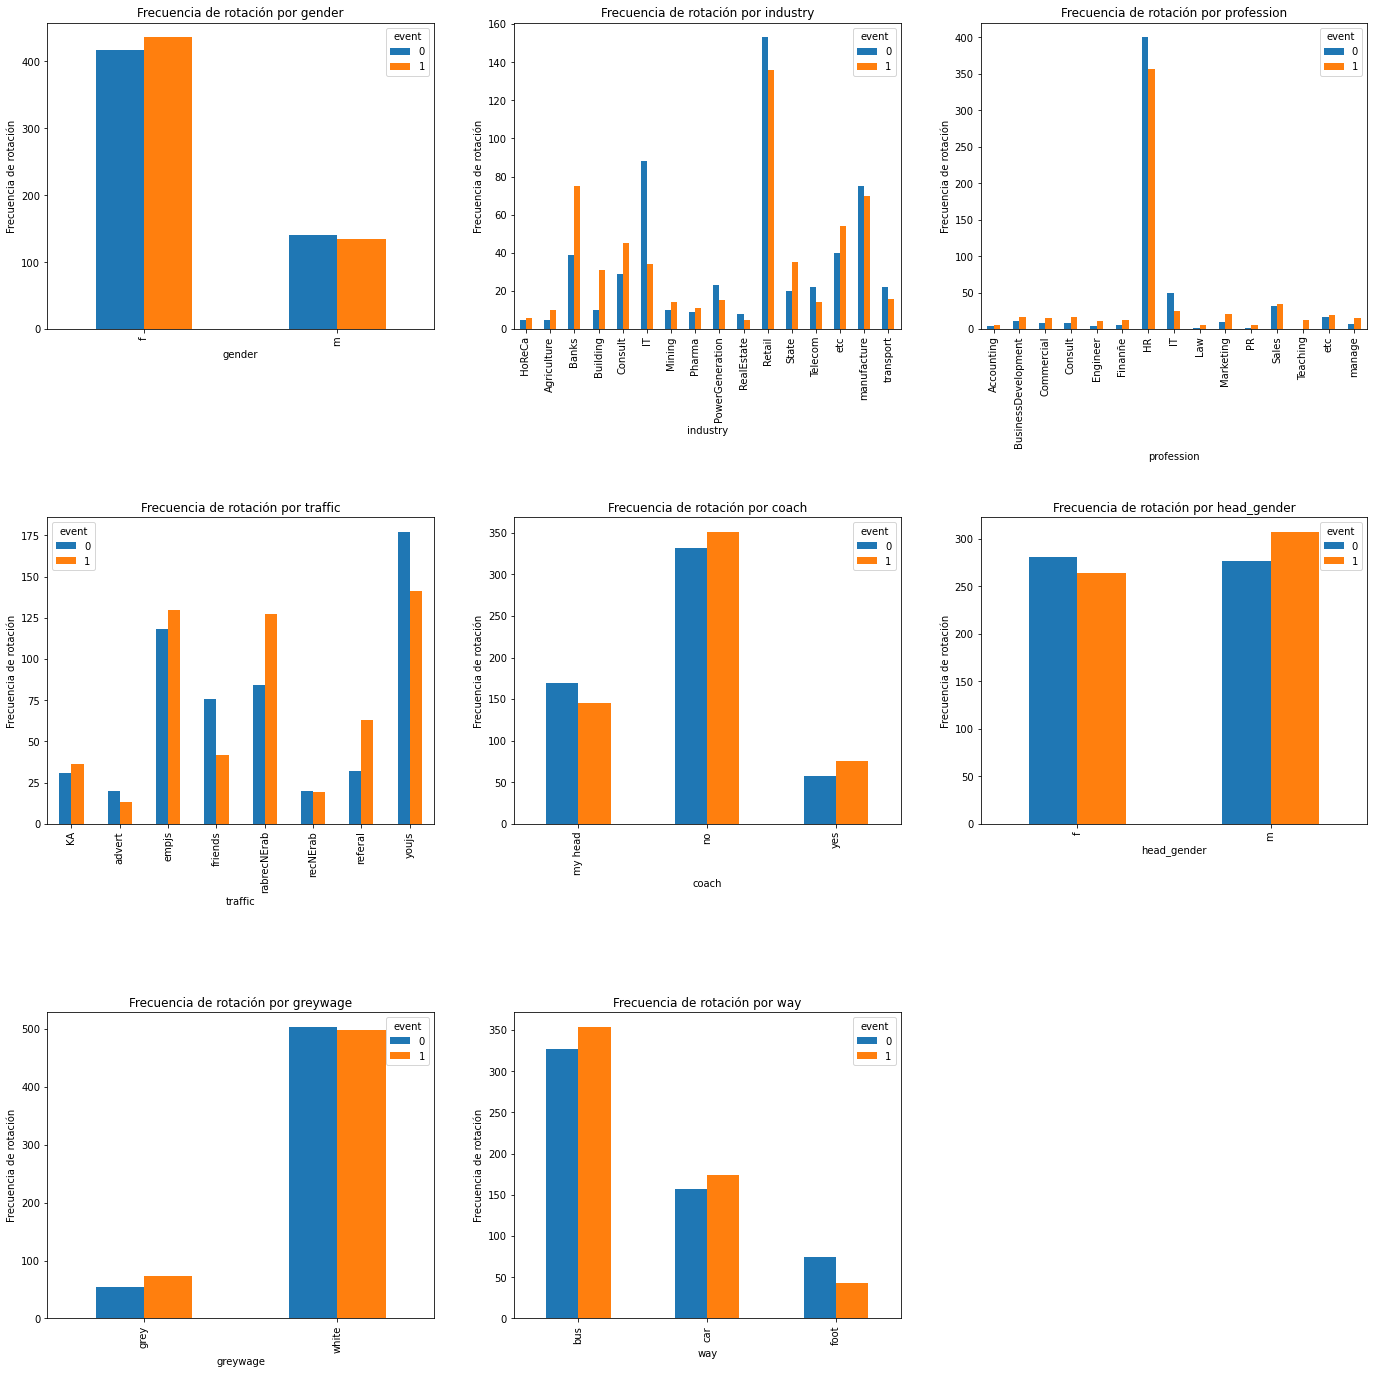

In [28]:
rows    = 3
columns = 3
c       = 1 # Inicializar plot counter

# Histograma categorical variables
fig = plt.figure(figsize=(20,20))
for i in df_objects.columns.values:

    ax = plt.subplot(rows,columns,c)
    pd.crosstab(df[i],df.event).plot(kind='bar',ax=ax)
    plt.title('Frecuencia de rotación por {}'.format(i))
    plt.ylabel('Frecuencia de rotación')
    plt.xlabel('{}'.format(i))
    plt.tight_layout(pad=4.0)
    c = c + 1

plt.show()

De la gráfica anterior se puede observar lo siguiente:

- Las mújeres son más probables de abandonar su lugar de trabajo
- Es claro que la frecuencia de rotación depende en gran parte de la profesión e industria, por lo que pueden ser buenas variables para el modelo predictor.



Por último, es bueno representar las variables númericas en gráficos de histogramas.

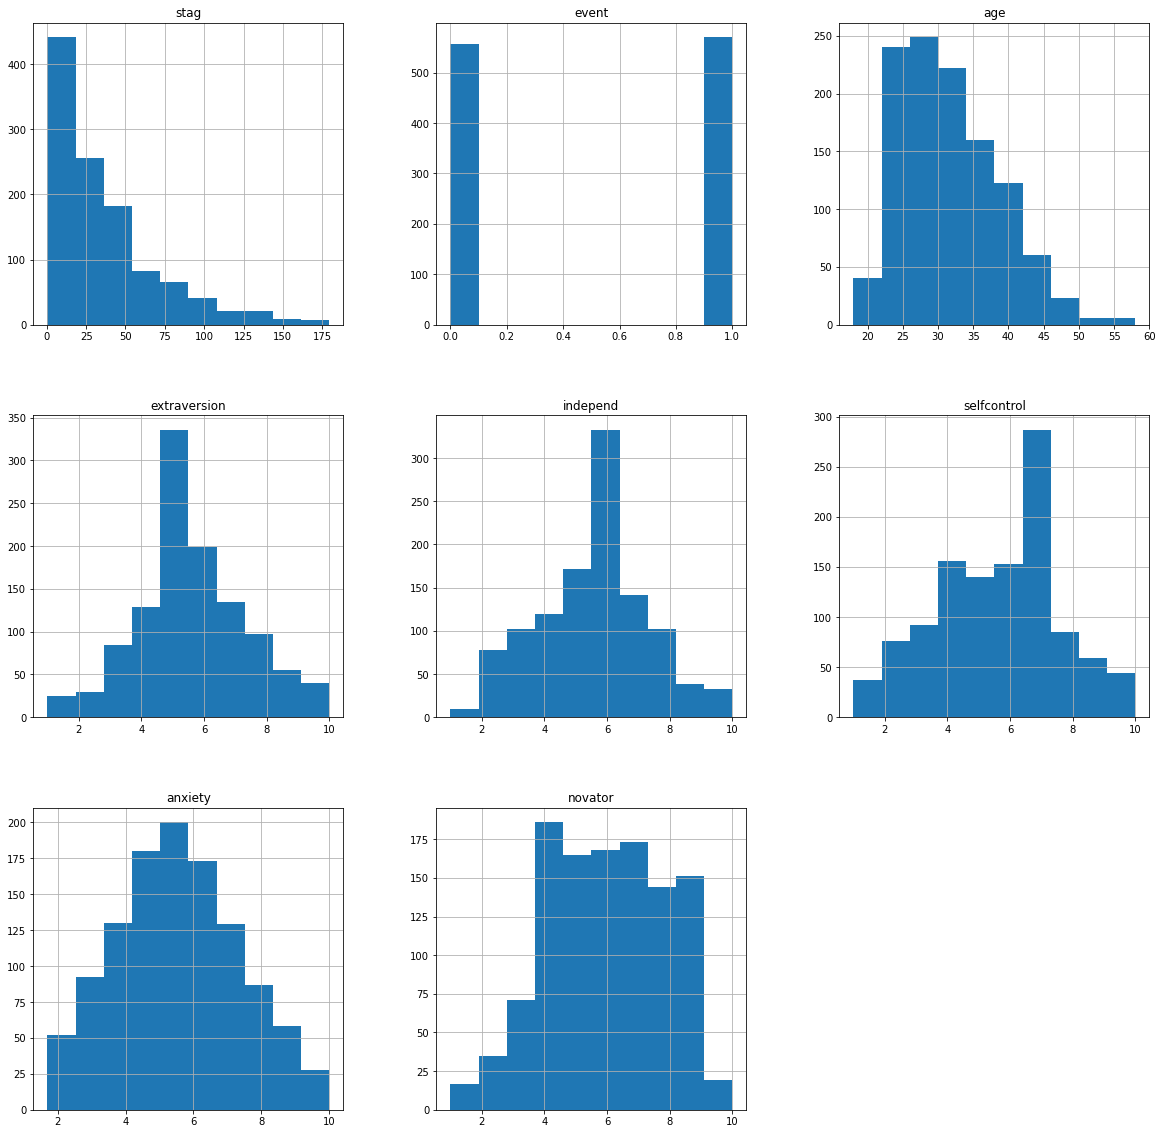

In [29]:
num_bins = 10
histograma = df.hist(bins=num_bins, figsize=(20,20))